Nama    : Andreas Christianto
NIM     : 2440023002

### AdaLine

In [2]:
import numpy as np

In [3]:
class AdalineGD(object):

	"""ADAptive LInear NEuron classifier.

	Parameters
	-----------
	eta : float
		Learning rate (between 0.0 and 1.0)
	n_iter : int
		Passes over the training dataset.

	Attributes
	-----------
	w_ : 1d-array
		Weights after fitting.
	errors_ : list
		Number of misclassifications in every epoch.

	"""

	def __init__(self, eta = 0.01, n_iter = 50):
		self.eta = eta
		self.n_iter = n_iter

	def fit(self, X, y):

		""" Fit training data.

		Parameters
		-----------
		X : {array-like}, shape = [n_samples, n_features]
			Training vectors,
			where n_samples is the number of samples and
			n_features is the number of features.
		y : array-like, shape = [n_samples]
			Target values.

		Return
		-------
		self : object

		"""

		self.w_ = np.zeros(1 + X.shape[1])
		# print(self.w_)
		self.cost_ = []

		for i in range(self.n_iter):
			output = self.net_input(X)
			errors = (y - output)
			self.w_[1:] += self.eta * X.T.dot(errors)
			self.w_[0] += self.eta * errors.sum()
			cost = (errors ** 2).sum() / 2.0
			self.cost_.append(cost)

		return self

	def net_input(self, X):

		""" Calculate net input """

		return np.dot(X, self.w_[1:]) + self.w_[0]

	def activation(self, X):

		""" Compute linear activation """

		return self.net_input(X)

	def predict(self, X):

		""" Return class label after unit step """

		return np.where(self.activation(X) >= 0.0, 1, -1)

	def accuracy(self, X, y):
		predictions = self.predict(X)
		accuracy = np.mean(predictions == y) * 100
		return accuracy

### Data

In [4]:
X = [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], [0.70, 0.65], [0.92, 0.45]
X = np.array(X)
y = [1, 1, 1, 1, -1, -1, -1, -1]
y = np.array(y)

### Import Library

In [5]:
adaline = AdalineGD(eta=0.1, n_iter=200)
adaline.fit(X,y)

In [6]:
predictions = adaline.predict(X)

In [7]:
print(predictions)

[ 1  1  1  1 -1 -1 -1 -1]


In [8]:
accuracy = adaline.accuracy(X, y)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 100.00%


### MSE Curve

In [9]:
import matplotlib.pyplot as plt

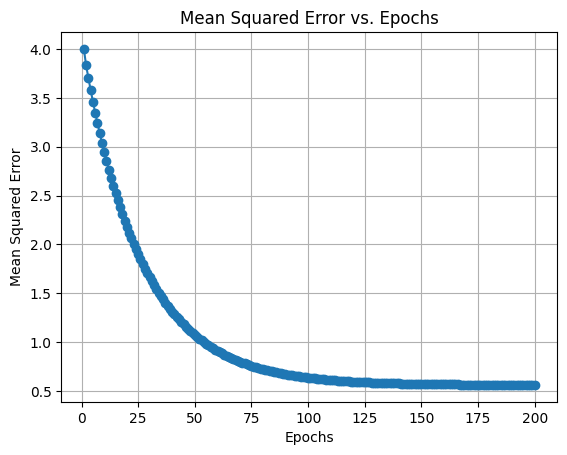

In [10]:
plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid()
plt.show()

C:\Users\Andreas Christianto\AppData\Local\Temp\ipykernel_15788\2614158955.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


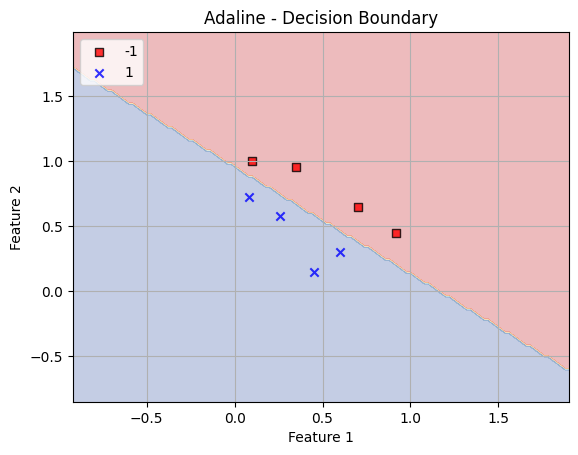

In [11]:
# Plotting decision boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = plt.cm.RdYlBu
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Plot data points and decision boundary
plot_decision_regions(X, y, classifier=adaline)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title('Adaline - Decision Boundary')
plt.grid()
plt.show()